## Applied Linear Algebra
### Amantur Amatov Variant 3

### 1. Find an interpolation polynomial in the Lagrange form that passes through the four points whose coordinates form the columns of the matrix
$$P = \begin{bmatrix} -3 & -1 & 1 & 2 \\ -8 & -2 & -2 & 13 \end{bmatrix}$$


### Solution:
$$L(x) = \sum_{i=0}^{n} y_{i} \frac{\prod_{i} (x - x_{j})}{\prod_{j} (x_{i} - x_{j})} = \frac{\sum_{i=0}^n y_i v(x_0,...x_i,...,x_n)}{v(x_0,...,x_n)}$$

$$
L(x) = -8\frac{(x+1)(x-1)(x-2)}{(-3+1)(-3-1)(-3-2)} - 2\frac{(x+3)(x-1)(x-2)}{(-1+3)(-1-1)(-1-2)}-2\frac{(x+3)(x+1)(x-2)}{(1+3)(1+1)(1-2)}+13\frac{(x+3)(x+1)(x-1)}{(2+3)(2+1)(2-1)}=\frac{x^3-2x^2-x+2}{5}-\frac{x^3-7x+6}{6}+\frac{x^3+2x^2-5x-6}{4}+\frac{13(x^3+3x^2-x-3)}{15}=\frac{6x^3-5x^3+7.5x^3+26x^3-12x^2+15x^2+78x^2-6x+35x-37.5x-26x+12-30-45-78}{30}=\frac{23x^3}{20}+\frac{27x^2}{10}-\frac{23x}{20}-\frac{47}{10}
$$

Answer:
$$
L(x) = \frac{23x^3}{20}+\frac{27x^2}{10}-\frac{23x}{20}-\frac{47}{10}
$$

### Implementation:

In [87]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [88]:
P = np.array([[-3, -1, 1, 2],
            [-8, -2, -2, 13]])
X_array = P[0,:]
Y_array = P[1,:]

In [89]:
def Lagrange_interpol(x_arr, y_arr):
    X=sp.symbols('x')
    y=0
    for k in range ( len(x_arr) ):
        t=1
        for j in range ( len(y_arr) ):
            if j != k:
                t=t* ( (X-x_arr[j]) /(x_arr[k]-x_arr[j]) )
        y+= t*y_arr[k]
    return sp.simplify(y)

In [90]:
L = Lagrange_interpol(X_array,Y_array)
L

23*x**3/20 + 27*x**2/10 - 23*x/20 - 47/10

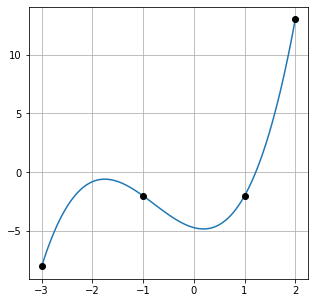

In [91]:
x = sp.symbols('x')
lambd = sp.lambdify(x, L)
x_real = np.linspace(-3, 2, 100)
L_int = lambd(x_real)
plt.figure(figsize = (5,5))
plt.plot(x_real,L_int)
plt.plot(X_array,Y_array,'o', color='black')
plt.grid()

### 2. Find a (parametric) equation defining the Bezier curve defined by the four points whose coordinates form the columns of the matrix
$$P = \begin{bmatrix} 1 & 3 & 5 & 7 \\ 1 & 2 & 1 & 3 \end{bmatrix}
$$



### Solution:
For n+1 points degree of polynomial 4 the formula will look like this:
$$B(t) = \sum_{k=0}^{n} C_n^k (1-t)^{n-k}t^kP_k$$

$$
B(t) = \begin{pmatrix} 3 \\ 0 \end{pmatrix} \cdot (1-t)^3\cdot t^0 \cdot \begin{pmatrix} 1 \\ 1 \end{pmatrix}+\begin{pmatrix} 3 \\ 1 \end{pmatrix}\cdot(1-t)^2\cdot t^1\cdot\begin{pmatrix} 3 \\ 2 \end{pmatrix}+\begin{pmatrix} 3 \\ 2 \end{pmatrix}\cdot(1-t)^1\cdot t^2\cdot\begin{pmatrix} 5 \\ 1 \end{pmatrix}+\begin{pmatrix} 3 \\ 3 \end{pmatrix}\cdot(1-t)^0\cdot t^3\cdot\begin{pmatrix} 7 \\ 3 \end{pmatrix}
$$

$$
B(t) = (-t^3+3t^2-3t+1)\begin{pmatrix} 1 \\ 1 \end{pmatrix} +(3t^3-t^2+t)\begin{pmatrix} 3 \\ 2 \end{pmatrix} + (-3t^3+3t^2)\begin{pmatrix} 5 \\ 0 \end{pmatrix} + t^3\begin{pmatrix} 7 \\ 3 \end{pmatrix}
$$

$$
B(t) = \begin{pmatrix} 6t+1 \\ 5t^3 - 6t^2 + 3t + 1\end{pmatrix}, t\in[0,1]
$$
### Implementation:

from math import comb

In [92]:
from math import comb

In [93]:
P = np.array([[1, 3, 5, 7],
            [1, 2, 1, 3]])
X_array = P[0,:]
Y_array = P[1,:]

In [94]:
def parametric_bezier(arr):
    t=sp.symbols('t')
    b = 0
    for k in range(len(arr)):
        b += comb(len(arr)-1,k)*(1-t)**(len(arr)-k-1)*t**k*arr[k]
    return sp.simplify(b)

In [95]:
Px = parametric_bezier(X_array)
Py = parametric_bezier(Y_array)

In [96]:
print('System of parametric equations:\nx(t)={}\ny(t)={}'.format(Px,Py))

System of parametric equations:
x(t)=6*t + 1
y(t)=5*t**3 - 6*t**2 + 3*t + 1


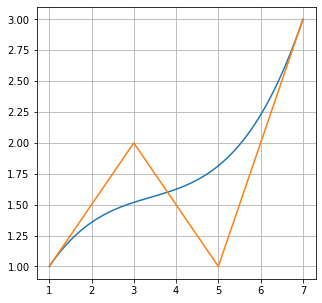

In [97]:
t = sp.symbols('t')
lambda_x = sp.lambdify(t, Px)
lambda_y = sp.lambdify(t, Py)
t_real = np.linspace(0, 1, 100)
x = lambda_x(t_real)
y = lambda_y(t_real)
plt.figure(figsize = (5,5))
plt.plot(x,y)
plt.plot(X_array,Y_array)
plt.grid()

### 3. Find a full rank decomposition and the pseudoinverse of the matrix
$$A = \begin{bmatrix} -1 & 2 & 2 \\ 8 & -1 & 2 \\ 2 & 1 & 2 \\ 5 & 0 & 2 \end{bmatrix}
$$

### Solution:

We need to find $F$ and $G$ such that $A = FG$
$$
\begin{pmatrix} -1 & 2 & 2 \\ 8 & -1 & 2 \\ 2 & 1 & 2 \\ 5 & 0 & 2 \end{pmatrix} =\begin{pmatrix} 5 & 0 & 2 \\ 6 & -2 & 0 \\ -3 & 1 & 0 \\ 3 & -1 & 0 \end{pmatrix}=\begin{pmatrix} 1 & 0 & 0.4 \\ -3 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix} \Rightarrow \begin{pmatrix} 1 & 0 & 0.4 \\ 0 & 1 & 1.2 \end{pmatrix} = G
$$
$rkA = 2$, it means that the first 2 columns of $A$ is a matrix $F$.
$$
F = \begin{pmatrix} -1 & 2\\ 8 & -1\\ 2 & 1\\ 5 & 0\end{pmatrix}
$$
Let's check it. 

In [98]:
F = np.array([[-1,2],[8,-1],[2,1],[5,0]])
G = np.array([[1, 0, 0.4],[0, 1, 1.2]])
A = np.array([[-1,2,2],[8,-1,2],[2,1,2],[5,0,2]])
F @ G == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Correct answer.
Let's find pseudoinverse matrix $A^{+} = G^+F^+$

$$
F^+ = (F^*F)^{-1}F^*
$$
$$
G^+ = G^*(GG^*)^{-1}
$$

In [99]:
F_plus = np.linalg.inv(F.T @ F) @ F.T
G_plus =  G.T @ np.linalg.inv(G @ G.T)
A_plus = (G_plus @ F_plus).round(5)
print('F_plus:\n {}\nG_plus:\n {}'.format(F_plus,G_plus))
print('A_plus:\n {}'.format(A_plus))

F_plus:
 [[ 0.02  0.08  0.04  0.06]
 [ 0.36 -0.06  0.22  0.08]]
G_plus:
 [[ 0.93846154 -0.18461538]
 [-0.18461538  0.44615385]
 [ 0.15384615  0.46153846]]
A_plus:
 [[-0.04769  0.08615 -0.00308  0.04154]
 [ 0.15692 -0.04154  0.09077  0.02462]
 [ 0.16923 -0.01538  0.10769  0.04615]]


So, 
$$
F^+ = \begin{pmatrix} 0.02 & 0.08 & 0.04 & 0.06\\0.36 & -0.06 & 0.22 & 0.08\end{pmatrix}
$$

$$
G^+ = \begin{pmatrix} 0.938 & -0.185 \\ -0.185 & 0.446 \\ 0.154 & 0.462\end{pmatrix}
$$

$$ 
A^{+} = G^+F^+= \begin{pmatrix} -0.04769 & 0.08615 & -0.00308 & 0.04154 \\ 0.15692 & -0.04154 & 0.09077 & 0.02462 \\0.16923 & -0.01538 & 0.10769 & 0.04615 \end{pmatrix}
$$
Let's check it:
$$ AA^+A = A $$

In [100]:
(A @ A_plus @ A).round(3) == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### 4. Find the minimal length least squares solution of the system of linear equations
$$
\left\{\begin{array}{4} 5x + 0y + 2z + 2t = 9\\
                        9x - 2y + 3z + 1t = 0\\
                        9x + 3y + 7z + 9t = 0\\
                        1x + 2y + 1z + 3t = 7
       \end{array}\right.
$$
### Solution: 
Let's pretend this system of linear equations in matrix form: 
$$
X = \begin{pmatrix} x \\ y \\ z \\ t \end{pmatrix}, 
A =  \begin{pmatrix} 5 & 0 & 2 & 2 \\  9 & -2 & 3 & 1 \\ 9 & 3 & 7 &  9 \\  1 & 2 & 1 & 3\end{pmatrix},
B = \begin{pmatrix} 9 \\ 0 \\ 0 \\ 7\end{pmatrix}
$$
The solution is
$ \tilde{X} = A^+B $ where $A^{+} = G^+F^+$

$$
F^+ = (F^*F)^{-1}F^*
$$
$$
G^+ = G^*(GG^*)^{-1}
$$

Let's find full rank recomposition of $A$ via Gauss Elimination.
$$
A =  \begin{pmatrix} 5 & 0 & 2 & 2 \\  9 & -2 & 3 & 1 \\ 9 & 3 & 7 &  9 \\  1 & 2 & 1 & 3\end{pmatrix}=
     \begin{pmatrix} 1 & 2 & 1 & 3 \\  0 & 4 & 1.2 & 5.2 \\ 0 & 3 & 0.4 & 3.6 \\  0 & 2 & 0.6 & 2.6\end{pmatrix}=
     \begin{pmatrix} 1 & 2 & 1 & 3 \\  0 & 1 & 0.3 & 1.3 \\ 0 & 0 & 0.5 & 0.3 \\  0 & 0 & 0 & 0\end{pmatrix}=
     \begin{pmatrix} 1 & 2 & 0 & 2.4 \\ 0 & 1 & 0 & 1.12 \\ 0 & 0 & 1 & 0.6 \\  0 & 0 & 0 & 0\end{pmatrix}=
     \begin{pmatrix} 1 & 0 & 0 & 0.16 \\ 0 & 1 & 0 & 1.12 \\ 0 & 0 & 1 & 0.6 \\  0 & 0 & 0 & 0\end{pmatrix}
$$
So, $rkA = 3$ and matrix $G$ is:
$$
G = \begin{pmatrix} 1 & 0 & 0 & 0.16 \\ 0 & 1 & 0 & 1.12 \\ 0 & 0 & 1 & 0.6\end{pmatrix}
$$
And matrix $F$ is:
$$
F = \begin{pmatrix} 5 & 0 & 2 \\  9 & -2 & 3\\ 9 & 3 & 7\\  1 & 2 & 1\end{pmatrix}
$$

So, we need to find
$ \tilde{X} = (F^*F)^{-1}F^*G^*(GG^*)^{-1}B $ 

In [101]:
A = np.array([[5, 0, 2, 2], 
              [9, -2, 3, 1], 
              [9, 3, 7 , 9], 
              [1, 2, 1 , 3]])
F = np.array([[5, 0, 2], 
              [9, -2, 3], 
              [9, 3, 7], 
              [1, 2, 1]])
G = np.array([[1, 0, 0, 0.16],[0, 1, 0, 1.12],[0, 0, 1, 0.6]])
B = np.array([9, 0, 0, 7])
F_plus = (np.linalg.inv(F.T @ F) @ F.T).round(2)
G_plus =  (G.T @ np.linalg.inv(G @ G.T)).round(2)
A_plus = (G_plus @ F_plus).round(2)
print('F_plus:\n {}\nG_plus:\n {}'.format(F_plus,G_plus))
print('A_plus:\n {}'.format(sp.latex(A_plus)))
X_tilde = A_plus @ B
print('X_tilde:\n {}'.format(X_tilde.round(2)))

F_plus:
 [[ 0.23  0.11 -0.16  0.35]
 [ 0.25 -0.09 -0.12  0.59]
 [-0.4  -0.1   0.4  -0.7 ]]
G_plus:
 [[ 0.99 -0.07 -0.04]
 [-0.07  0.52 -0.25]
 [-0.04 -0.25  0.86]
 [ 0.06  0.42  0.23]]
A_plus:
 [[ 0.23  0.12 -0.17  0.33]
 [ 0.21 -0.03 -0.15  0.46]
 [-0.42 -0.07  0.38 -0.76]
 [ 0.03 -0.05  0.03  0.11]]
X_tilde:
 [ 4.38  5.11 -9.1   1.04]


So,
$$
F^+ = \begin{pmatrix} 0.23 & 0.11 & -0.16 & 0.35 \\  0.25 & -0.09 & -0.12 & 0.59 \\ -0.4 & -0.1 & 0.4 &  -0.7\end{pmatrix}
$$
$$
G^+ = \begin{pmatrix}  0.99 & -0.07 & -0.04 \\ -0.07 & 0.52 & -0.25 \\ -0.04 & -0.25 & 0.86 \\0.06 & 0.42 & 0.23\end{pmatrix}
$$
$$
A+ = \begin{pmatrix}  0.23 & 0.12 & -0.17 & 0.33 \\ 0.21 & -0.03 & -0.15 & 0.46 \\ -0.42 & -0.07 & 0.38 & -0.76 \\ 0.03 & -0.05 & 0.03 & 0.11\end{pmatrix}
$$
$$
\tilde{X} = A^+*B = \begin{pmatrix}  4.38 \\ 5.11 \\ -9.1 \\ 1.04\end{pmatrix}
$$

### 5. For the polynomial $x^3 − 3x^2 - 4x - 6$ find the best approximation with respect to the max-norm by a polynomial of degree 2 on a line segment [0, 5].

### Solution:

From consequence of Chebyshev Theorem for interval [a,b]:
$$
\overline{T}_n(x) = \alpha\frac{(b-a)^n}{2^{2n-1}}T_n\left(\frac{2x-(b+a)}{b-a}\right)
$$
where $\alpha = 1$ (coefficient by variable with highest degree),$n = 3$, $a = 0$ and $b = 5$.

$$
\overline{T}_3(x) = \frac{5^3}{2^{5}}T_3\left(\frac{2x-5}{5}\right)
$$
Chebyshev polynomial of the degree equal to 3:
$$
T_3(x) = 4x^3-3x
$$
So, 
$$
T_3\left(\frac{2x-5}{5}\right) = 4(\frac{2x-5}{5})^3 - 3\frac{2x-5}{5} = 4(0.4x-1)^3 - 1.2x + 3 = 4(0.064x^3-3*0.16x^2 + 3*0.4x - 1) - 1.2x + 3 =0.256x^3-1.92x^2+4.8x-4-1.2x+3 = 0.256x^3-1.92x^2 + 3.6x - 1
$$

So,
$$
\overline{T}_3(x) = \frac{5^3}{2^{5}}T_3\left(\frac{2x-5}{5}\right)= \frac{125}{32}(0.256x^3-1.92x^2 + 3.6x - 1) = 
x^3-7.5x^2+14.0625x-\frac{125}{32}
$$

From Chebyshev Theorem:
$$
||f(x) - P_{n-1}(x)||_\infty \rightarrow \min_{x \in [a,b]},
$$
where 
$$
f(x) - P_{n-1}(x) = \overline{T}_n(X)
\Rightarrow P_{n-1}(x) = f(x) - \overline{T}_n(X)
$$

So we got:
$$
P_{2}(x) = x^3-7.5x^2+14.0625x-\frac{125}{32} - x^3 + 3x^2 + 4x + 6 = -4.5x^2 + 18.0625x + 2.09375
$$

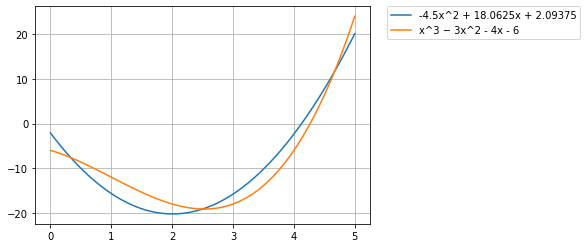

In [102]:
x = np.linspace(0, 5, 100)
y_cheb = 4.5*x**2 - 18.0625*x - 2.09375
y_real = x**3-3*x**2-4*x-6
plt.plot(x, y_cheb, label='-4.5x^2 + 18.0625x + 2.09375')
plt.plot(x, y_real, label='x^3 − 3x^2 - 4x - 6')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### 6. Find all the values of q such that the equation $2x^2 + xy (−6q − 2) + y^2(12q + 1) + z^2(12q − 1) = 1$ defines a unit circle with respect to some norm? Find the value of this norm fro the vector (1, 1, 1) as a function of q.




### Solution:
Let's build a matrix of quadratic form for this equation:

$$
M = \begin{pmatrix} 2 & \frac{-6q-2}{2} & 0 \\\frac{-6q-2}{2} & 12q+1 & 0 \\ 0 & 0 & 12q-1\end{pmatrix}
$$

Let's find $q$ values, such that this quadratic form is positive definite matrix.

$\Delta_1 = 1 > 0$ for any $q$

$\Delta_2 = 2*(12q+1) - \frac{(-6q-2)^2}{4} = -3q^2+19.5q+1.5 > 0$ for $\frac{3-\sqrt{10}}{3}<q<\frac{3+\sqrt{10}}{3}$

$\Delta_3 = 2(12q+1)(12q-1) - (12q-1)\frac{(-6q-2)^2}{4}=-108q^3+225q^2-6q-1>0 $ for $q<\frac{3-\sqrt{10}}{3}$ or $\frac{1}{12}<q<\frac{3+\sqrt{10}}{3}$

So, our quadratic form is positive definite and defines a unit circle with respect to some norm on interval:
$$q\in\left(\frac{1}{12}, \frac{3+\sqrt{10}}{3}\right)$$

Let's take a vector $v$, such that $v=(1,1,1)$, such that lies on this unit circle.
So, general equation for plane is $z = ax + by + c$ and our system will look like this:
$$
\left\{\begin{array}{4} 0 = a*0+b*0+c\\
                        1 = a*1+b*1+c
       \end{array}\right.
\Rightarrow
\left\{\begin{array}{4} c = 0\\ a + b = 1
       \end{array}\right.
$$

With these coefficients our vector will be defined by two planes $z=y$ and $z=x$. Let's find, where our planes and ellipsoid intersect.

$$
\left\{\begin{array}{4} z = y\\
                        z = x\\
                        2x^2 + xy (−6q − 2) + y^2(12q + 1) + z^2(12q − 1) = 1\end{array}\right.
$$

$$
2x^2+x^2(−6q − 2)+x^2(12q + 1)+x^2(12q − 1) = 1 \Rightarrow
$$
$$
x^2(2-6q-2+12q+1+12q-1)=1 \Rightarrow
$$
$$
x^2 = \frac{1}{18q} \Rightarrow
$$
$$
z=x=y=\pm\frac{1}{\sqrt{18q}}
$$

We need to take positive numbers, because coordinates of $v$ are positive.
$$
v^0 = \begin{pmatrix}\frac{1}{\sqrt{18q}}\\ \frac{1}{\sqrt{18q}}\\\frac{1}{\sqrt{18q}}\end{pmatrix}
$$
So, our vector $v$ is calculated like $v =\sqrt{18q}*v^0$

By definition of norm, $$N(v) = |\sqrt{18q}|*N(v^0)$$
$$N(v) = \sqrt{18q}$$

Norm of vector $(1,1,1) = \sqrt{18q},q\in\left(\frac{1}{12}, \frac{3+\sqrt{10}}{3}\right)$